In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from matplotlib import pyplot as plt
from support_functions import plot_confusion_matrix, generate_features_targets
from sklearn.metrics import classification_report,confusion_matrix

#data = np.load('galaxy_catalogue.npy')

In [10]:
def dtc_predict_actual(data):
  # split the data into training and testing sets using a training fraction of 0.7
  training_set,testing_set=splitdata_train_test(data,0.7)
  train_features,train_targets=generate_features_targets(training_set)
  test_features,test_targets=generate_features_targets(testing_set)
  scaler = StandardScaler()
  scaler.fit(train_features)
  train_features = scaler.transform(train_features)
  test_features = scaler.transform(test_features)
  mlp = MLPClassifier()
  mlp.fit(train_features,train_targets)
  predictions = mlp.predict(test_features)
  return predictions,test_targets

In [11]:
def splitdata_train_test(data, fraction_training):
  np.random.shuffle(data)
  split_index = int(fraction_training*len(data))
  return data[:split_index],data[split_index:]

In [12]:
def generate_features_targets(data):
  targets = data['class']
  features = np.empty(shape=(len(data), 13))
  features[:, 0] = data['u-g']
  features[:, 1] = data['g-r']
  features[:, 2] = data['r-i']
  features[:, 3] = data['i-z']
  features[:, 4] = data['ecc']
  features[:, 5] = data['m4_u']
  features[:, 6] = data['m4_g']
  features[:, 7] = data['m4_r']
  features[:, 8] = data['m4_i']
  features[:, 9] = data['m4_z']
  # concentration in u filter
  features[:, 10] = data['petroR50_u']/data['petroR90_u']
  # concentration in r filter
  features[:, 11] = data['petroR50_r']/data['petroR90_r']
  # concentration in z filter
  features[:, 12] = data['petroR50_z']/data['petroR90_z']
  return features, targets

C:\Users\User\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[[71 14  1]
 [ 2 58  5]
 [ 0  7 76]]
Some initial results...
   predicted,  actual
0. spiral, spiral
1. merger, merger
2. spiral, spiral
3. elliptical, elliptical
4. merger, merger
5. merger, merger
6. elliptical, elliptical
7. elliptical, elliptical
8. spiral, spiral
9. elliptical, elliptical
234
234
accuracy =  0.8760683760683761
Confusion matrix, without normalization
[[58 14  7]
 [ 2 71  0]
 [ 5  1 76]]


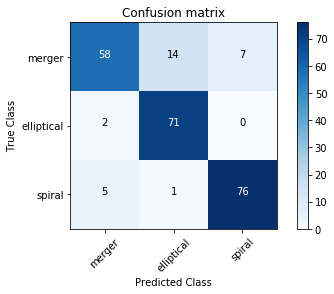

In [17]:
if __name__ == '__main__':
  data = np.load('galaxy_catalogue.npy')
    
  predicted_class, actual_class = dtc_predict_actual(data)
  print(confusion_matrix(predicted_class,actual_class))
  print("Some initial results...\n   predicted,  actual")
  for i in range(10):
    print("{}. {}, {}".format(i, predicted_class[i], actual_class[i]))
  print(len(predicted_class))
  print(len(actual_class))
  accuracy= sum(predicted_class==actual_class)/len(actual_class)
  print("accuracy = ",accuracy)
    

  class_labels = list(set(actual_class))
  model_cm = confusion_matrix(y_true=actual_class, y_pred=predicted_class, labels=class_labels)    
  plt.figure()
  plot_confusion_matrix(model_cm, classes=class_labels, normalize=False)
  plt.show()